
#Using Deep AutoVIML for tabular dataset

References:
https://www.youtube.com/watch?v=IcpwNNNXsWE

Dataset: https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv

https://github.com/srivatsan88/YouTubeLI/blob/master/AutoViML.ipynb

In [2]:
!pip install deep_autoviml --upgrade

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys,tempfile, urllib, os
from deep_autoviml import deep_autoviml as deepauto

In [5]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [6]:
import urllib.request
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [7]:
df = pd.read_csv(OUTPUT_FILE)
df.round()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.0,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.0,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.0,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.0,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,85.0,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.0,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.0,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.0,306.6,Yes


In [8]:
train, test = train_test_split(df, test_size=0.33, random_state=42)
print(train.shape, test.shape)

(4718, 21) (2325, 21)


In [9]:
keras_model_type =  "auto" ## "fast" first, then "fast2", "auto", etc.
keras_options = {'early_stopping': True}
model_options = {'max_trials': 10, "tuner": "storm"}
target = "Churn"

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 4718 rows, 20 cols
Data Set columns info:
* customerid: 0 nulls, 4718 unique vals, most common: {'5174-ITUMV': 1, 

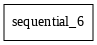


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.9008863819500403}
    original datasize = 4718, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 49
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 5000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 49, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting valida

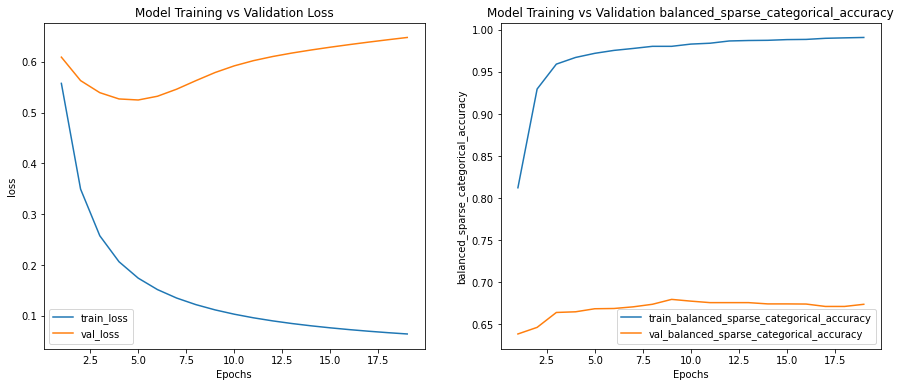

Time taken to train model (in mins) = 2
    Stopped epoch = 9
Held out data actuals shape: (480,)
    samples from label: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

Held out predictions shape:(480,)
    Sample predictions: [0 1 0 1 0 1 0 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Churn
#################################################################


    Accuracy          = 74.8%
    Balanced Accuracy = 67.1%
    Precision         = 49.6%
    Average Precision = 66.6%
    Recall            = 51.7%
    F1 Score          = 50.6%
    ROC AUC           = 73.4%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0007746196
    set learning rate using best model: 0.0007746196
    max epochs for training = 9

Model not being saved since save_model_flag set to False...
6318

Saving vocab dictionary using pickle in test/auto/model_2021_11_06-06_20_14/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in test/auto/model_2021_11_06-06_20_14/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in test/auto/model_2021_11_06-06_20_14/artifacts/var_df.pickle...will take time...
    Saved pickle file in test/auto/model_2021_11_06-06_20_14/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken =

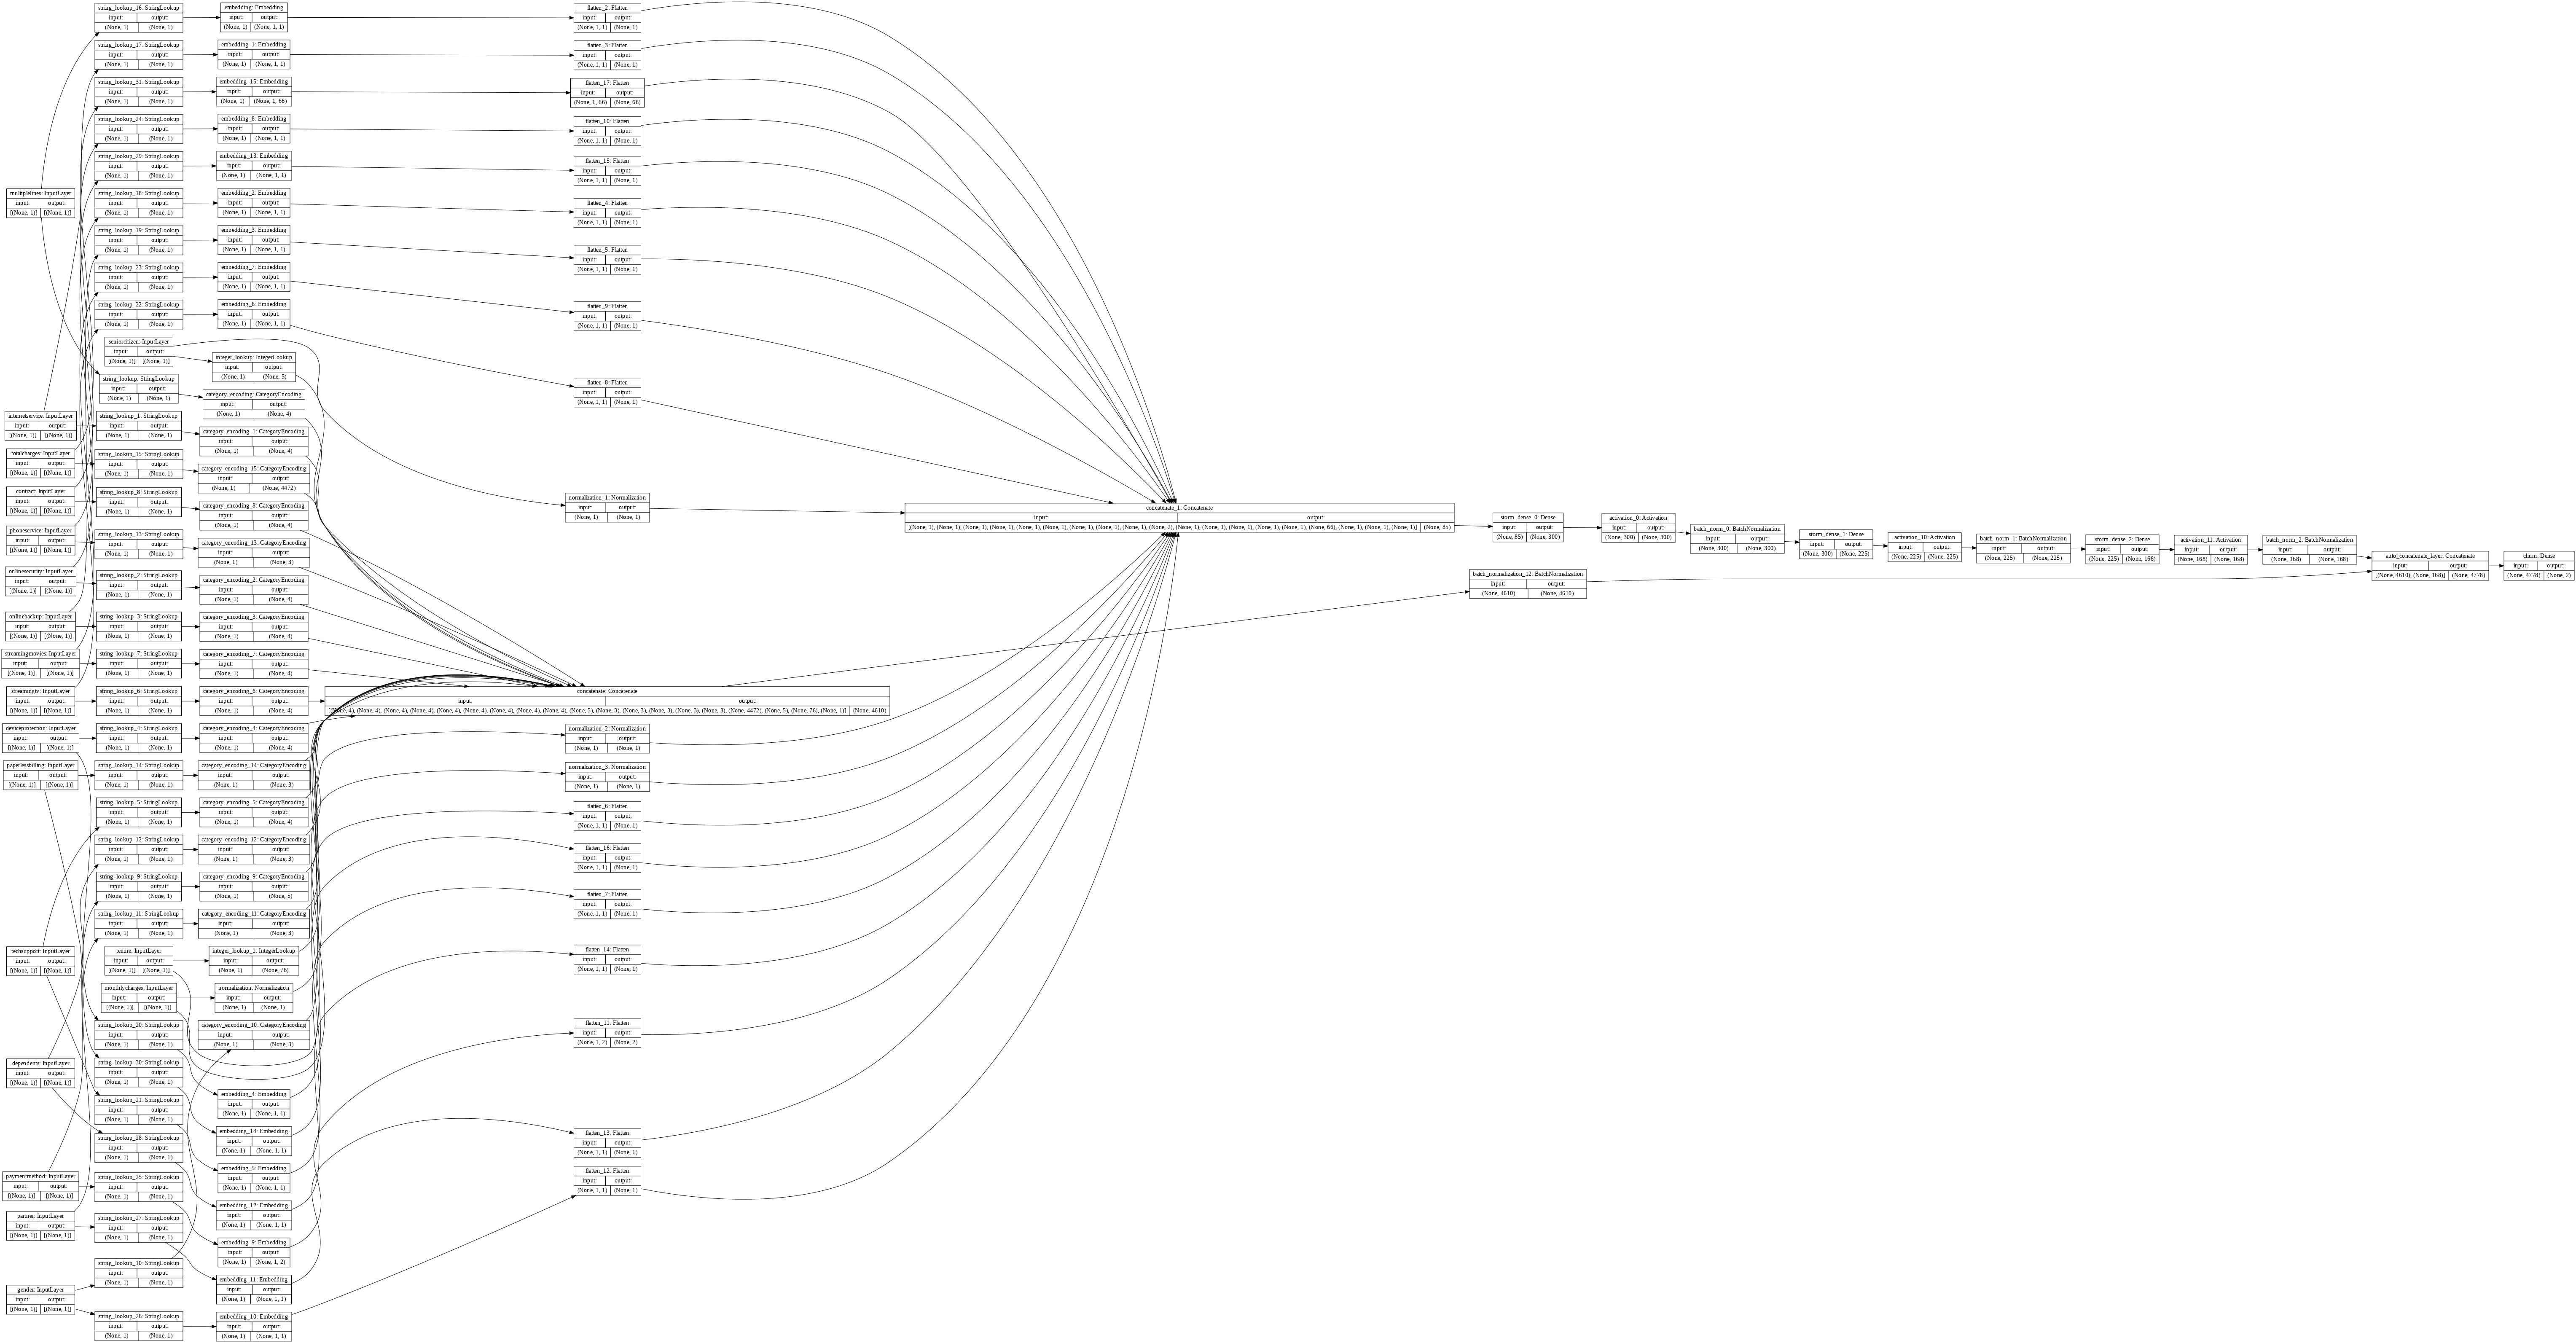

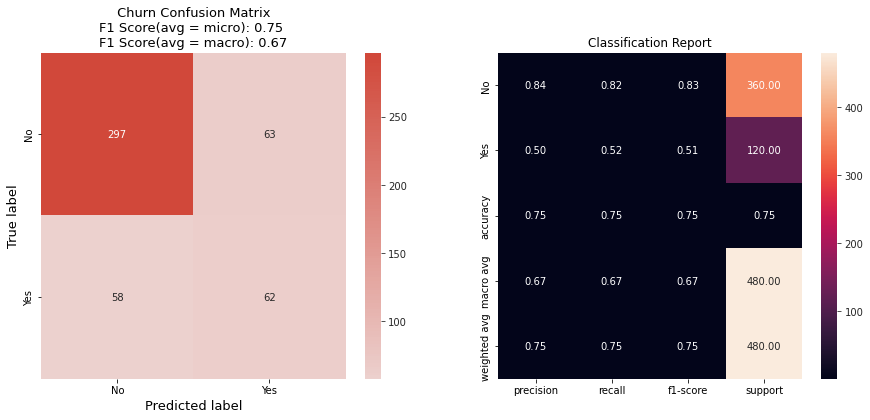

In [10]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type,
		project_name='test', keras_options=keras_options,  
		model_options=model_options, save_model_flag=False, use_my_model='', verbose=2)

In [13]:
predictions = deepauto.predict(model, project_name='test', test_dataset=test, keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7fb6b3a00410> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fb6b3a00410> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 2325
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    21 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 6, cats = 10, high cats = 0, very high cats = 2
Distribution of integer columns in d

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test[target].values, predictions[1]))

              precision    recall  f1-score   support

          No       0.91      0.65      0.76      1697
         Yes       0.47      0.84      0.60       628

    accuracy                           0.70      2325
   macro avg       0.69      0.74      0.68      2325
weighted avg       0.79      0.70      0.72      2325

